In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [20]:
C_a = 20000
I_z = 25854
l_f = 1.55
l_r = 1.39
m = 1888.6
x_dot = [2, 5, 8]
x_dot = np.arange(1, 40, 0.1)
C = np.eye(4)
rank_P_ls = []
rank_Q_ls = []
U_P_ls = []
S_P_ls = []
VT_P_ls = []
U_Q_ls = []
S_Q_ls = []
VT_Q_ls = []
P_S_log = []
poles = np.zeros((len(x_dot), 4))
# A = A = np.array([[0, 1, 0, 0], [0, -4*C_a/(m*x_dot), 4*C_a/m, -2*C_a*(l_f - l_r)/(m*x_dot)], [0, 0, 0, 1], [0, -2*C_a*(l_f - l_r)/(I_z*x_dot), 2*C_a*(l_f - l_r)/(I_z), -2*C_a*(l_f**2 + l_r**2)/(I_z*x_dot)]])
# B = np.array([[0, 0], [2*C_a/m, 0], [0, 0], [2*C_a*l_f/I_z, 0]])

In [21]:
for j, i in enumerate(x_dot):
    A = A = np.array([[0, 1, 0, 0], [0, -4*C_a/(m*i), 4*C_a/m, -2*C_a*(l_f - l_r)/(m*i)], [0, 0, 0, 1], [0, -2*C_a*(l_f - l_r)/(I_z*i), 2*C_a*(l_f - l_r)/(I_z), -2*C_a*(l_f**2 + l_r**2)/(I_z*i)]])
    B = np.array([[0, 0], [2*C_a/m, 0], [0, 0], [2*C_a*l_f/I_z, 0]])
    poles[j, :] = np.linalg.eig(A)[0]
    P = np.concatenate((B, A@B, A@A@B, A@A@A@B), axis=1)
    rank_P_ls.append(np.linalg.matrix_rank(P))
    U_P, S_P, VT_P = np.linalg.svd(P)
    U_P_ls.append(U_P)
    S_P_ls.append(S_P)
    VT_P_ls.append(VT_P)
    P_S_log.append(np.log10(S_P[0]/S_P[-1]))
    Q = np.concatenate((C, A, A@A, A@A@A), axis=0)
    rank_Q_ls.append(np.linalg.matrix_rank(Q))
    U_Q, S_Q, VT_Q = np.linalg.svd(Q)
    U_P_ls.append(U_Q)
    S_P_ls.append(S_Q)
    VT_P_ls.append(VT_Q)

Text(0, 0.5, 'v')

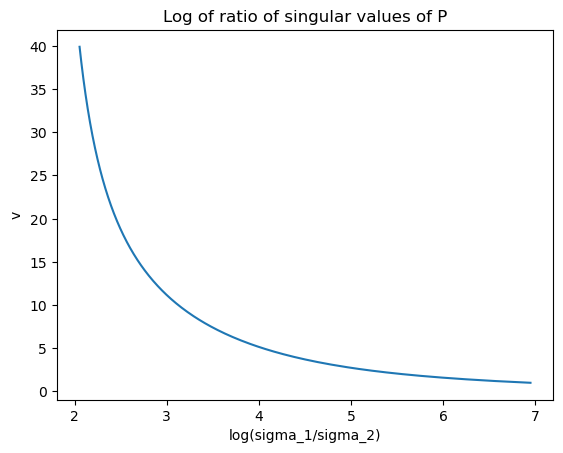

In [14]:
plt.figure()
plt.plot(P_S_log, x_dot)
plt.title('Log of ratio of singular values of P')
plt.xlabel('log(sigma_1/sigma_2)')
plt.ylabel('v')

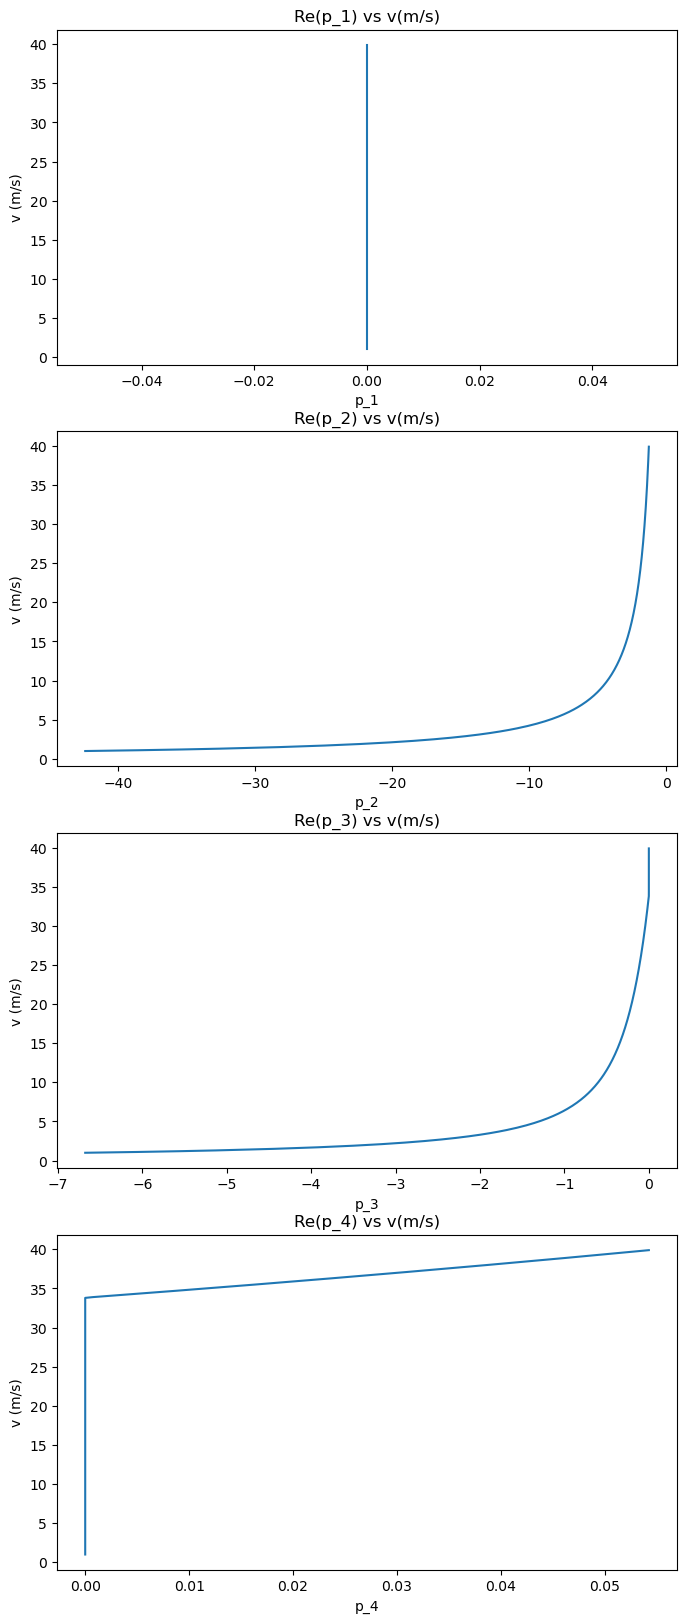

In [35]:
f, ax = plt.subplots(4,1)
f.set_figheight(20)
f.set_figwidth(8)
# ax.set_xlabel(f'p_{k}')
# ax.set_ylabel('v (m/s)')
for k in range(4):
    ax[k].plot(poles[:,k].real, x_dot)
    ax[k].set_title(f'Re(p_{k+1}) vs v(m/s)')
    ax[k].set_xlabel(f'p_{k+1}')
    ax[k].set_ylabel('v (m/s)')


In [18]:
x_dot = 2
A = A = np.array([[0, 1, 0, 0], [0, -4*C_a/(m*x_dot), 4*C_a/m, -2*C_a*(l_f - l_r)/(m*x_dot)], [0, 0, 0, 1], [0, -2*C_a*(l_f - l_r)/(I_z*x_dot), 2*C_a*(l_f - l_r)/(I_z), -2*C_a*(l_f**2 + l_r**2)/(I_z*x_dot)]])
print(np.linalg.eig(A)[0])

[ 0.00000000e+00 -2.12053235e+01 -3.32752316e+00 -2.33581730e-16]
